In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
import plotly.express as px

In [32]:
df= pd.read_csv('final_processed_data.csv')

In [33]:
df

,user_id,age_range,gender,merchant_id,label,kind,item_id,category_id,brand_id,time_stamp,action_type
0,34944,5,0,2116,-1,train,867,656,7334,1017,0
1,252288,3,0,3990,-1,train,825,662,5644,819,0
2,210048,3,1,4255,-1,train,866,1213,1573,711,2
3,210048,3,1,4255,-1,train,866,1213,1573,711,0
4,210048,3,1,4255,-1,train,866,1213,1573,711,0
...,...,...,...,...,...,...,...,...,...,...,...
9157,340607,6,1,2692,-1,test,802,1075,6343,809,0
9158,340607,6,1,2692,-1,test,802,1075,6343,809,3
9159,340607,6,1,2692,-1,test,802,1075,6343,809,0
9160,340607,6,1,2692,-1,test,802,1075,6343,809,0


<AxesSubplot:xlabel='age_range', ylabel='count'>

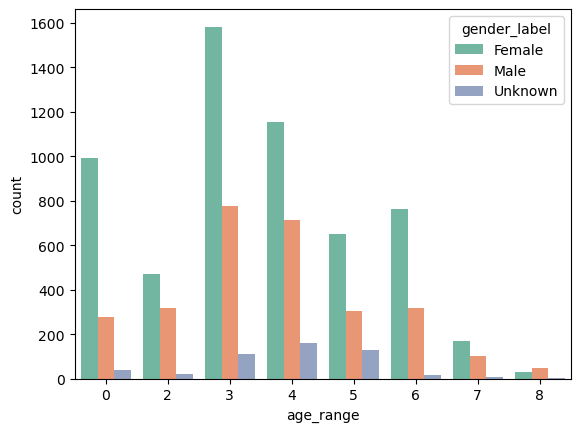

In [34]:
gender_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['gender_label'] = df['gender'].replace(gender_labels)

sns.countplot(x='age_range', hue='gender_label', data=df, palette='Set2')

## Identifying the categories that have the highest spending by female customers.

Set of Catgegories in the given dataset :

In [35]:
distinct_categories = df['category_id'].unique()
distinct_categories

array([ 656,  662, 1213, 1112, 1389,  308, 1467,  276,  120,  898, 1591,
        302,  834, 1098, 1075,  407, 1528,  737,  267, 1397, 1147,  420,
        500,  639,  389,  563,  266,  351, 1181, 1238,  833, 1438, 1505,
       1023,  177,  555,  180,  614, 1401, 1656, 1188, 1095,   36,   35,
        464, 1553,  748, 1157,  278, 1228,  154, 1577,  946,  384,  844,
       1431,    2, 1142,  766,  812, 1486, 1611,  451, 1124,  756, 1326,
         11, 1293, 1657,  387,  815,  163,  895, 1271,  602,  641,  992,
        795, 1174, 1208,  184,   73,  628, 1518,  247,  825,  821,  115,
        493, 1628, 1105])

### How many men and women aren't regular purchasers of a merchant's product ?!

Label '0' = 176 rows (user is not a repeated buyer for the merchant)

Label '1' = 23 rows (user is a repeated buyer for the merchant)

Label '-1' = 4445 rows (user is not a new customer for the merchant)

Merchant perspective variable

<AxesSubplot:xlabel='gender_label', ylabel='count'>

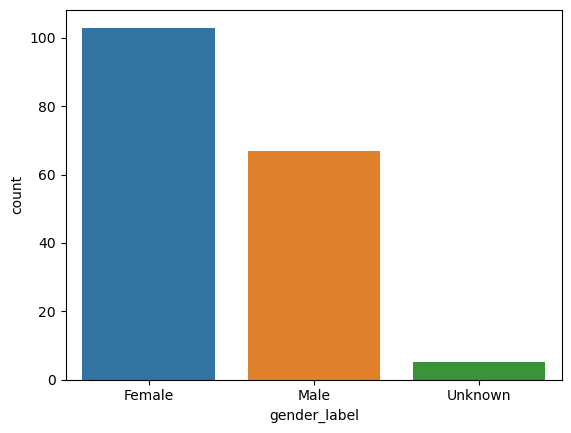

In [36]:
non_repeated_buyers = df[df['label'] == 0]
non_repeated_buyers

# male_df = df[df['label'] == 0]

# gender_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
# df['gender_label'] = df['gender'].replace(gender_labels)

sns.countplot(x='gender_label', data=non_repeated_buyers)


### What are the product categories in which men and women spent the most when utilizing a promotion or participating in a one-day offer event?

<AxesSubplot:xlabel='category_id', ylabel='count'>

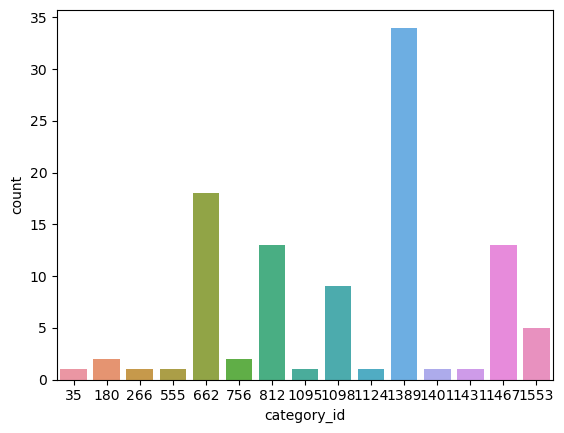

In [37]:
female_non_common_buyers_df = df[(df['gender'] == 0) & (df['label'] == 0)]
female_non_common_buyers_df

sns.countplot(x='category_id', data=female_non_common_buyers_df)

## Category Analysis

In [38]:
df['category_id'].nunique()

91

In [39]:
x=df.groupby('category_id').count()
x = x.iloc[:, 0:1]
x = x.rename(columns={"user_id": "Cat_count"})
x=x.reset_index()
x.sort_values('Cat_count',ascending=False,inplace=True)
new_df = x.iloc[5:]
s=new_df['Cat_count'].sum()
x = x.iloc[:5]
x['category_id'] = x['category_id'].astype(str)
x.loc[len(df)] = ['Others', s]
fig = px.pie(x, values='Cat_count', names='category_id', 
             color='category_id', color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'category_id': 'Category ID', 'Cat_count': 'Cat_Count'})
fig.update_layout(legend_title='Top 5 categories', title_text="Top 5 categores with the moat activity")

fig.show()

In [41]:
del x

In [42]:
dff=df[df['gender']==0]

In [43]:
x=dff.groupby('category_id').count()
x = x.iloc[:, 0:1]
x = x.rename(columns={"user_id": "Cat_count"})
x=x.reset_index()
x.sort_values('Cat_count',ascending=False,inplace=True)
new_df = x.iloc[5:]
s=new_df['Cat_count'].sum()
x = x.iloc[:5]
x['category_id'] = x['category_id'].astype(str)
x.loc[len(df)] = ['Others', s]
fig = px.pie(x, values='Cat_count', names='category_id', 
             color='category_id', color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'category_id': 'Category ID', 'Cat_count': 'Cat_Count'})
fig.update_layout(legend_title='Top 5 categories', title_text="Top 5 categores with the moat activity by women")

fig.show()

In [44]:
del x

In [45]:
dfm=df[df['gender']==1]

In [46]:
x=dfm.groupby('category_id').count()
x = x.iloc[:, 0:1]
x = x.rename(columns={"user_id": "Cat_count"})
x=x.reset_index()
x.sort_values('Cat_count',ascending=False,inplace=True)
new_df = x.iloc[5:]
s=new_df['Cat_count'].sum()
x = x.iloc[:5]
x['category_id'] = x['category_id'].astype(str)
x.loc[len(df)] = ['Others', s]
fig = px.pie(x, values='Cat_count', names='category_id', 
             color='category_id', color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'category_id': 'Category ID', 'Cat_count': 'Cat_Count'})
fig.update_layout(legend_title='Top 5 categories', title_text="Top 5 categores with the most activity by men")

fig.show()

In [47]:
del x

In [48]:
dffp=df[(df['gender']==0) & (df['action_type']==2)]

In [49]:
x=dffp.groupby('category_id').count()
x = x.iloc[:, 0:1]
x = x.rename(columns={"user_id": "Cat_count"})
x=x.reset_index()
x.sort_values('Cat_count',ascending=False,inplace=True)
new_df = x.iloc[5:]
s=new_df['Cat_count'].sum()
x = x.iloc[:5]
x['category_id'] = x['category_id'].astype(str)
x.loc[len(df)] = ['Others', s]
fig = px.pie(x, values='Cat_count', names='category_id', 
             color='category_id', color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'category_id': 'Category ID', 'Cat_count': 'Cat_Count'})
fig.update_layout(legend_title='Top 5 categories', title_text="Top 5 categores most purchased by men")

fig.show()

In [50]:
del x

In [51]:
dfmp=df[(df['gender']==1) & (df['action_type']==2)]

In [52]:
x=dfmp.groupby('category_id').count()
x = x.iloc[:, 0:1]
x = x.rename(columns={"user_id": "Cat_count"})
x=x.reset_index()
x.sort_values('Cat_count',ascending=False,inplace=True)
new_df = x.iloc[5:]
s=new_df['Cat_count'].sum()
x = x.iloc[:5]
x['category_id'] = x['category_id'].astype(str)
x.loc[len(df)] = ['Others', s]
fig = px.pie(x, values='Cat_count', names='category_id', 
             color='category_id', color_discrete_sequence=px.colors.qualitative.Dark2,
             labels={'category_id': 'Category ID', 'Cat_count': 'Cat_Count'})
fig.update_layout(legend_title='Top 5 categories', title_text="Top 5 categores most purchased by women")

fig.show()